The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


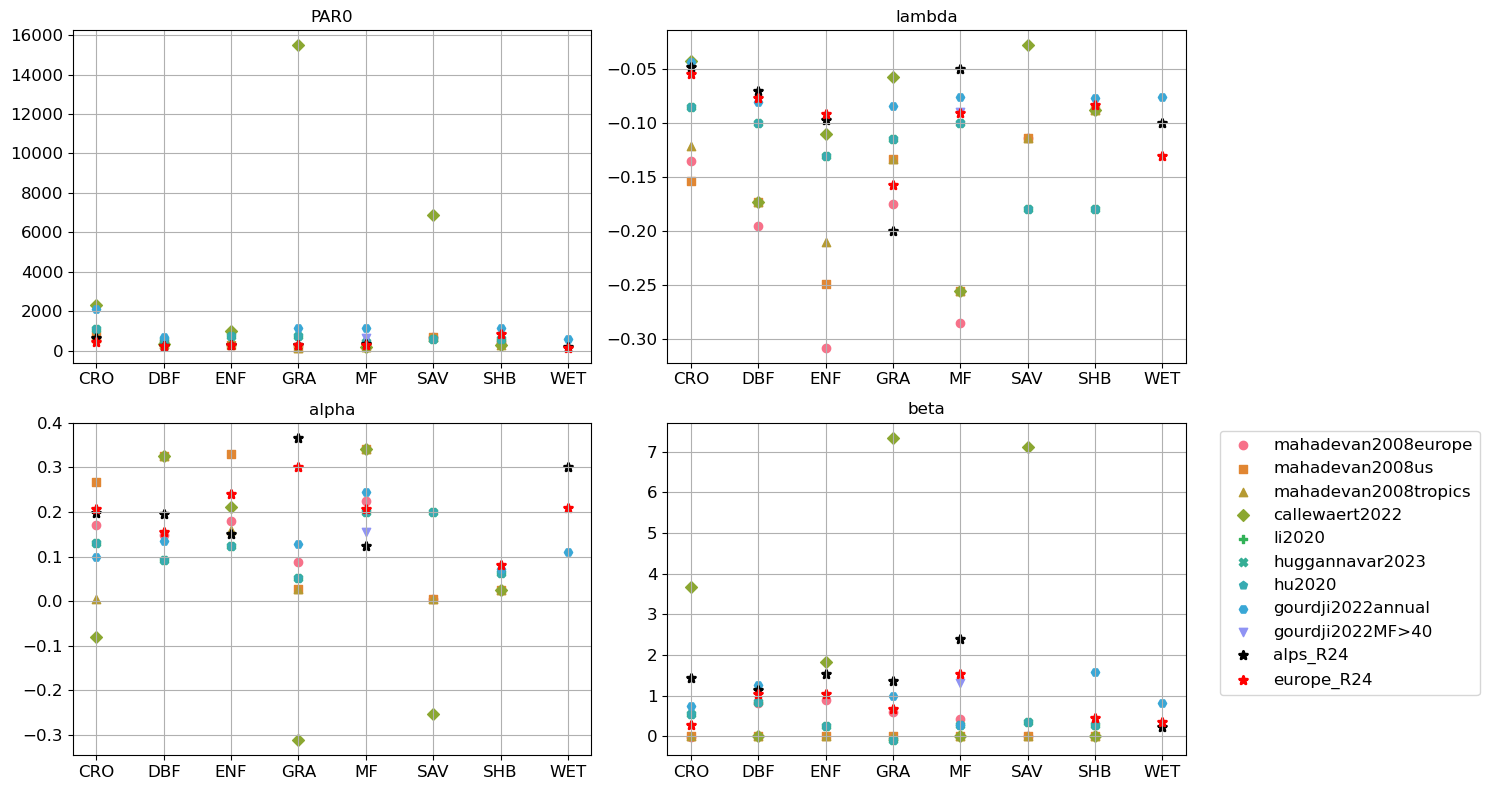

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

region = "Alps" #  "Alps" or  "Europe"
VPRM_old_or_new = "old"
run_ID = "diff_evo_V8_100"

with open("VPRM_all_params_literature_old.csv", "r") as file:
    data = file.read()
tables = data.split("\n\n")

dfs = []
nr_of_tables = 0
for table in tables:
    if not table.strip():  # Skip empty tables
        continue
    df = pd.read_csv(StringIO(table))
    df.set_index(df.columns[0], inplace=True)
    dfs.append(df)
    nr_of_tables += 1
for df in dfs:
    df.sort_index(axis=1, inplace=True)

df_tuned_alps = pd.read_csv("Alps_parameters_median_old_Alps_VPRM_optimized_params_"+run_ID+".csv")
df_tuned_alps.drop(index=df_tuned_alps[df_tuned_alps['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -0.505
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'PAR0', df_tuned_alps.columns != 'Parameter'] *= 0.505
df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
df_tuned_alps.sort_index(axis=1, inplace=True)

df_tuned_europe = pd.read_csv("Europe_parameters_median_old_Europe_VPRM_optimized_params_"+run_ID+".csv")
df_tuned_europe.drop(index=df_tuned_europe[df_tuned_europe['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_europe['Parameter'] = df_tuned_europe['Parameter'].replace({'lambd': 'lambda'})
df_tuned_europe.loc[df_tuned_europe['Parameter'] == 'lambda', df_tuned_europe.columns != 'Parameter'] *= -0.505
df_tuned_europe.loc[df_tuned_europe['Parameter'] == 'PAR0', df_tuned_europe.columns != 'Parameter'] *= 0.505
df_tuned_europe.set_index(df_tuned_europe.columns[0], inplace=True)
df_tuned_europe.sort_index(axis=1, inplace=True)


params = ['PAR0', 'lambda', 'alpha', 'beta']
colors = sns.color_palette("husl", len(dfs))
markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']

font_size = 12

fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # Increase width of plots

for i, (param, ax) in enumerate(zip(params, axes.flat)):
    for j, (df, marker) in enumerate(zip(dfs, markers)):
        citation_name = df.index.name
        ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
        ax.grid(True)
    # Plot df_tuned_alps using thick black horizontal line as a marker
    ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='black', label='alps_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    ax.scatter(df_tuned_europe.columns, df_tuned_europe.loc[param], marker='*', color='red', label='europe_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    ax.set_title(param)
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Add a legend on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size)

plt.tight_layout()
plt.savefig(
    "compare_params_to_literature_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


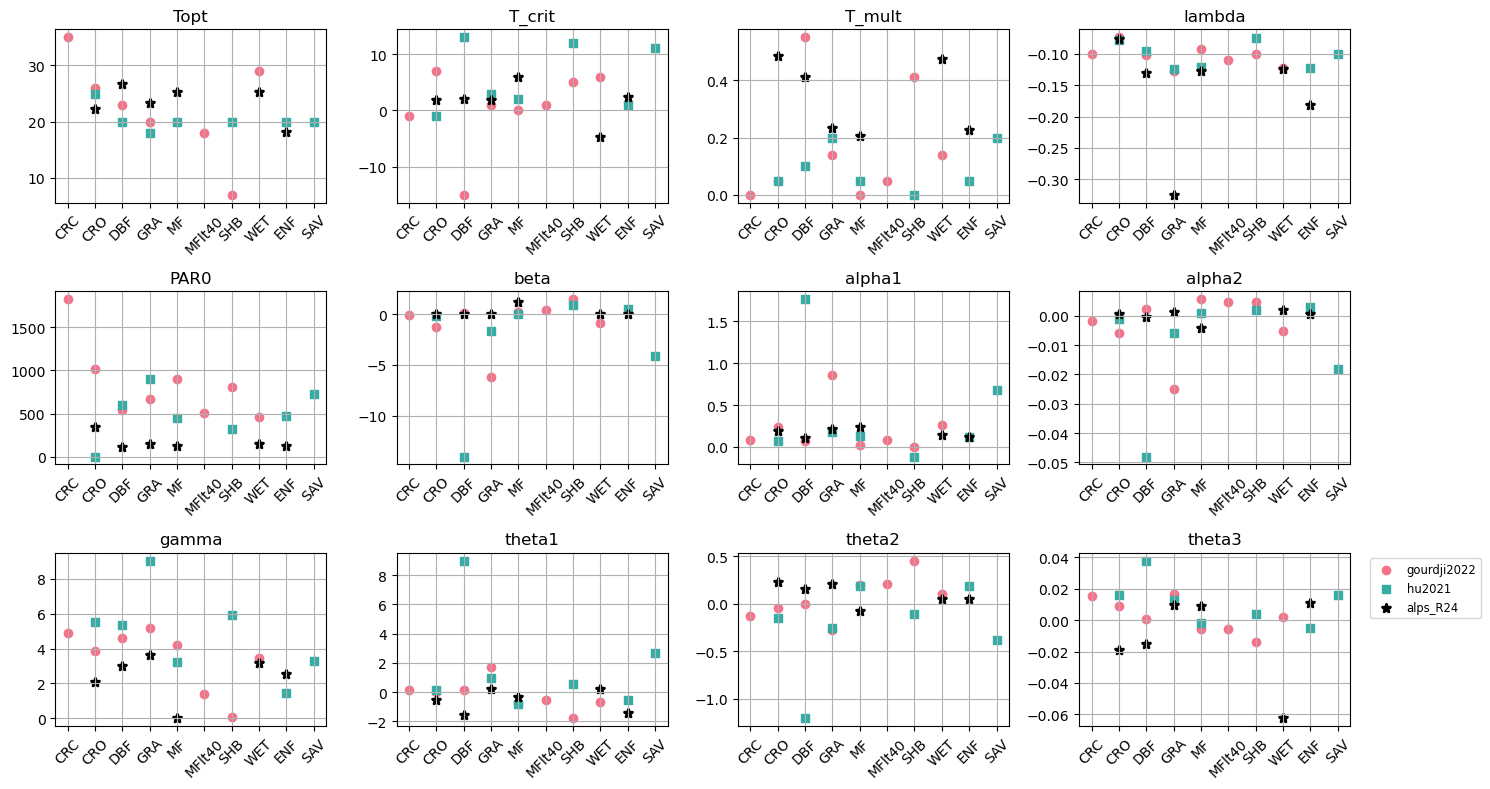

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

VPRM_old_or_new = "new"
run_ID = "diff_evo_V16_200"

with open("VPRM_all_params_literature_"+VPRM_old_or_new+".csv", "r") as file:
    data = file.read()
tables = data.split("\n\n")

dfs = []
nr_of_tables = 0
for table in tables:
    if not table.strip():  # Skip empty tables
        continue
    df = pd.read_csv(StringIO(table))
    df.set_index(df.columns[0], inplace=True)
    dfs.append(df)
    nr_of_tables += 1
for df in dfs:
    df.sort_index(axis=1, inplace=True)
    

# Alps_parameters_mean_new_Alps_VPRM_optimized_params_diff_evo_V4_100
# Alps_parameters_mean_new_Europe_VPRM_optimized_params_diff_evo_V4_100.csv'

df_tuned_alps = pd.read_csv("Alps_parameters_median_"+VPRM_old_or_new+"_Alps_VPRM_optimized_params_"+run_ID+".csv")
#df_tuned_alps.drop(index=df_tuned_alps[df_tuned_alps['Parameter'] == 'Topt'].index, inplace=True)
df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -0.505
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'PAR0', df_tuned_alps.columns != 'Parameter'] *= 0.505
df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
df_tuned_alps.sort_index(axis=1, inplace=True)




params = ['Topt','T_crit', 'T_mult', 'lambda', 'PAR0', 'beta','alpha1', 'alpha2', 'gamma', 'theta1', 'theta2', 'theta3']
colors = sns.color_palette("husl", len(dfs))
markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']




fig, axes = plt.subplots(3, 4, figsize=(15, 8))  # Increase width of plots

for i, (param, ax) in enumerate(zip(params, axes.flat)):
    for j, (df, marker) in enumerate(zip(dfs, markers)):
        citation_name = df.index.name
        ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
    # Plot df_tuned_alps using thick black horizontal line as a marker
    ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='black', label='alps_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    # ax.scatter(df_tuned_europe.columns, df_tuned_europe.loc[param], marker='*', color='red', label='europe_R24', linewidth=2)  # Increase linewidth for df_tuned_alps
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(param)

# Add a legend on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.savefig(
    "compare_params_to_literature_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


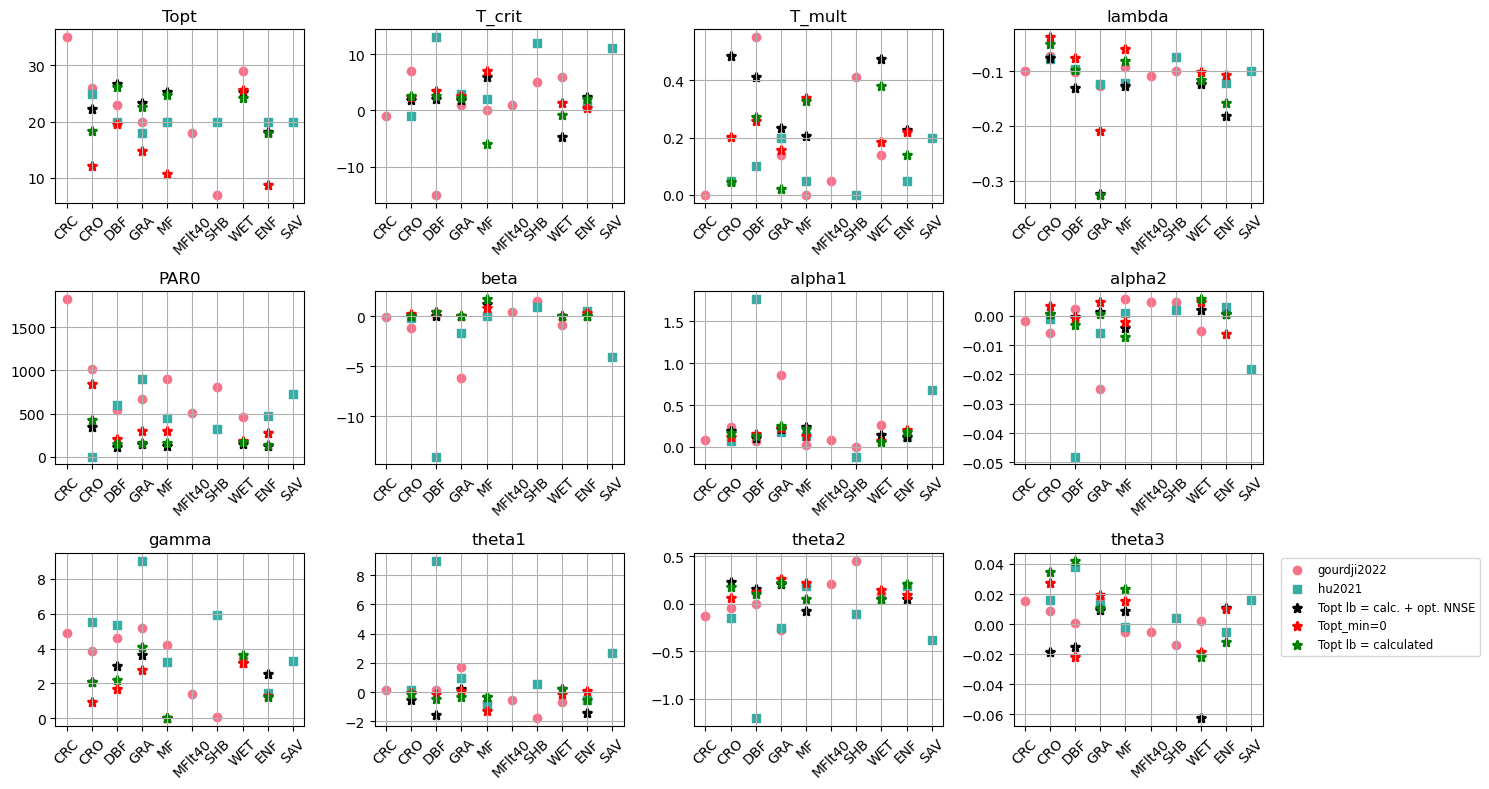

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

VPRM_old_or_new = "new"
run_ID = "diff_evo_V16_200"
run_ID_str = "Topt lb = calc. + opt. NNSE"
run_ID2 = "diff_evo_V7_100"
run_ID2_str = "Topt_min=0"
run_ID3 = "diff_evo_V10_100"
run_ID3_str = "Topt lb = calculated"

with open("VPRM_all_params_literature_"+VPRM_old_or_new+".csv", "r") as file:
    data = file.read()
tables = data.split("\n\n")

dfs = []
nr_of_tables = 0
for table in tables:
    if not table.strip():  # Skip empty tables
        continue
    df = pd.read_csv(StringIO(table))
    df.set_index(df.columns[0], inplace=True)
    dfs.append(df)
    nr_of_tables += 1
for df in dfs:
    df.sort_index(axis=1, inplace=True)

# Load the tuned Alps datasets for the three run_IDs
df_tuned_alps = pd.read_csv("Alps_parameters_median_"+VPRM_old_or_new+"_Alps_VPRM_optimized_params_"+run_ID+".csv")
df_tuned_alps['Parameter'] = df_tuned_alps['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'lambda', df_tuned_alps.columns != 'Parameter'] *= -0.505
df_tuned_alps.loc[df_tuned_alps['Parameter'] == 'PAR0', df_tuned_alps.columns != 'Parameter'] *= 0.505
df_tuned_alps.set_index(df_tuned_alps.columns[0], inplace=True)
df_tuned_alps.sort_index(axis=1, inplace=True)

df_tuned_alps2 = pd.read_csv("Alps_parameters_median_"+VPRM_old_or_new+"_Alps_VPRM_optimized_params_"+run_ID2+".csv")
df_tuned_alps2['Parameter'] = df_tuned_alps2['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps2.loc[df_tuned_alps2['Parameter'] == 'lambda', df_tuned_alps2.columns != 'Parameter'] *= -0.505
df_tuned_alps2.loc[df_tuned_alps2['Parameter'] == 'PAR0', df_tuned_alps2.columns != 'Parameter'] *= 0.505
df_tuned_alps2.set_index(df_tuned_alps2.columns[0], inplace=True)
df_tuned_alps2.sort_index(axis=1, inplace=True)

df_tuned_alps3 = pd.read_csv("Alps_parameters_median_"+VPRM_old_or_new+"_Alps_VPRM_optimized_params_"+run_ID3+".csv")
df_tuned_alps3['Parameter'] = df_tuned_alps3['Parameter'].replace({'lambd': 'lambda'})
df_tuned_alps3.loc[df_tuned_alps3['Parameter'] == 'lambda', df_tuned_alps3.columns != 'Parameter'] *= -0.505
df_tuned_alps3.loc[df_tuned_alps3['Parameter'] == 'PAR0', df_tuned_alps3.columns != 'Parameter'] *= 0.505
df_tuned_alps3.set_index(df_tuned_alps3.columns[0], inplace=True)
df_tuned_alps3.sort_index(axis=1, inplace=True)

params = ['Topt','T_crit', 'T_mult', 'lambda', 'PAR0', 'beta','alpha1', 'alpha2', 'gamma', 'theta1', 'theta2', 'theta3']
colors = sns.color_palette("husl", len(dfs))
markers = ['o', 's', '^', 'D', 'P', 'X', 'p', 'H', 'v']

fig, axes = plt.subplots(3, 4, figsize=(15, 8))  # Increase width of plots

for i, (param, ax) in enumerate(zip(params, axes.flat)):
    for j, (df, marker) in enumerate(zip(dfs, markers)):
        citation_name = df.index.name
        ax.scatter(df.columns, df.loc[param], marker=marker, label=citation_name, color=colors[j])
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
    # Plot df_tuned_alps, df_tuned_alps2, and df_tuned_alps3 using thick horizontal lines as markers
    ax.scatter(df_tuned_alps.columns, df_tuned_alps.loc[param], marker='*', color='black', label=run_ID_str, linewidth=2)
    ax.scatter(df_tuned_alps2.columns, df_tuned_alps2.loc[param], marker='*', color='red', label=run_ID2_str, linewidth=2)
    ax.scatter(df_tuned_alps3.columns, df_tuned_alps3.loc[param], marker='*', color='green', label=run_ID3_str, linewidth=2)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(param)

# Add a legend on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.savefig(
    "compare_params_to_literature_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)
